In [19]:
import pandas as pd
from sklearn.model_selection import train_test_split
# 1. 표본추출
df = pd.read_csv('data/iris.csv')
# 1)단순임의추출(복원, 비복원) : 각 원소(개체)에 번호를 부여하여, 임의적으로 n개를 추출하는 방법으로 모든 원소(개체)는 선택될 확률이 동일.
# 1-1) 단순임의추출 (n : 개수추출, frac : 비율추출, replace = True : 복원추출) 
df_simple = df.sample(frac = 0.5, replace = True, random_state = 2023)
print(len(df))
print(len(df_simple))
print('--------------------')



# 1-2) 독립변수/종속변수로 분리하여 단순임의추출을 진행하는 경우
X = df.drop(columns = ['target'])
y = df['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 2023)
print(X_train.shape)
print(y_train.value_counts())
print('----------')
print(X_test.shape)
print(y_test.value_counts())
print('--------------------')



# 2) 층화임의추출법 : 모집단이 이질적인 몇 개의 계층으로 이루어져 있을 때 모든 계층으로부터 원소(개체)를 임의로 추출하여,
#                 각 계층을 고루 대표할 수 있도록 임의적으로 표본을 추출하는 방법.(shuffle = True : default, 추출 전에 데이터를 섞음)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, stratify = y, random_state = 2023)
print(X_train.shape)
print(y_train.value_counts())
print('----------')
print(X_test.shape)
print(y_test.value_counts())


150
75
--------------------
(105, 4)
Iris-virginica     39
Iris-versicolor    33
Iris-setosa        33
Name: target, dtype: int64
----------
(45, 4)
Iris-versicolor    17
Iris-setosa        17
Iris-virginica     11
Name: target, dtype: int64
--------------------
(105, 4)
Iris-virginica     35
Iris-setosa        35
Iris-versicolor    35
Name: target, dtype: int64
----------
(45, 4)
Iris-virginica     15
Iris-setosa        15
Iris-versicolor    15
Name: target, dtype: int64


In [29]:
# 2. 샘플링
# 2-1) 오버샘플링
# 마이너 클래스의 샘플을 증가시켜 메이저 클래스의 샘플 크기를 동일하게 만드는 방법.
# 빅데이터 분석을 위해서는 많은 데이터 확보가 효과적이므로 오버샘플링 기법을 적용 추천.
# 2-1-1) SMOTE(Synthetic Minority Over-sampling Technique)
#  > 소수 레이블을 지닌 데이터 세트의 관측 값에 대한 K개의 최근접 이웃을 찾고,
#  > 관측값과 이웃으로 선택된 값 사이에 새로운 데이터를 생성하는 방법으로 샘플의 수를 늘리는 방법.
#  > 새로운 데이터나 작은 데이터셋에서는 사용하기가 어려움.
import pandas as pd
df = pd.read_csv('data/credit_final.csv')
X = df.drop(['credit.rating'], axis = 1)
y = df['credit.rating']
print(X.shape, y.shape)
print(y.value_counts()) # 0 : 300, 1 : 700
print('----------')

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, stratify = y, random_state = 2023)
print(X_train.shape, y_train.shape)
print(y_train.value_counts())
print(X_test.shape, y_test.shape)
print(y_test.value_counts())
print('----------')

#!pip3 install imblearn > imbalance learn
from imblearn.over_sampling import SMOTE
smote = SMOTE(k_neighbors = 5, sampling_strategy = 'minority')
X_resample, y_resample = smote.fit_resample(X_train, y_train)
print(X_resample.shape,y_resample.shape)
print(y_resample.value_counts()) # y_train 보다 전체 데이터 개수가 280개 늘어남(0 클래스가 280개 늘어남)
print('----------')

# 2-1-2) Random Over Sampling 
#  > 소수의 레이블을 지닌 데이터세트를 단순 복제하여 다수의 레이블과 비율을 맞추는 방법.
#  > 랜덤 오버샘플링은 동일한 정보를 복사하여 과적합을 유발 가능성 존재.
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(sampling_strategy = 'minority')
X_resample, y_resample = ros.fit_resample(X_train, y_train)
print(X_resample.shape, y_resample.shape)
print(y_resample.value_counts())
print('----------')

# 2-2) 언더샘플링
# 다수의 레이블을 가진 데이터를 샘플링하여 소수의 데이터세트를 가진 레이블의 수준으로 감소(데이터 손실 유발).
# 데이터 불균형 문제는 해소 가능하나, 학습 성능의 저하 가능성(과소적합) 존재.
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler(sampling_strategy = 'majority') # majority : 다수 레이블의 데이터를 샘플링
X_resample, y_resample = rus.fit_resample(X_train, y_train)
print(X_resample.shape, y_resample.shape)
print(y_resample.value_counts())

(1000, 20) (1000,)
1    700
0    300
Name: credit.rating, dtype: int64
----------
(700, 20) (700,)
1    490
0    210
Name: credit.rating, dtype: int64
(300, 20) (300,)
1    210
0     90
Name: credit.rating, dtype: int64
----------
(980, 20) (980,)
1    490
0    490
Name: credit.rating, dtype: int64
----------
(980, 20) (980,)
1    490
0    490
Name: credit.rating, dtype: int64
----------
(420, 20) (420,)
0    210
1    210
Name: credit.rating, dtype: int64


In [15]:
# 3. 데이터 표준화, 정규화
# 3-1) 데이터 표준화 또는 정규화가 필요한 이유
# > 차원마다 단위, 평균, 표준편차, 범위가 다르다면 우리가 학습시키는 머신이 그 차이를 인지하지 못함.
# > 통계는 표본집단의 평균과 분산으로 모집단의 평균과 분산을 설명하는 학문인데 차원마다 단위, 평균, 분산, 범위가 다르면
# > 스케일이 큰 집단에 영향을 많이 받음.
# > 즉, 우리는 머신에 학습을 시킬 때 각 차원을 유사한 단위, 평균, 분산, 범위로 맞춰 줘야 함.

# 3-2) StandardScaler(표준화)
# > 평균 0, 분산 1인 표준정규분포로 모든 데이터를 변환
# > 최솟값과 최댓값의 크기를 제한하지 않아 이상치에 민감 > 이상치 미리 확인 및 정제 필요
# > 분류분석에 유용
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

df = pd.read_csv('data/credit_final.csv')
X = df.drop(['credit.rating'], axis = 1)
y = df['credit.rating']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, stratify = y, random_state = 2023)

ss = StandardScaler()
X_train_scaled = ss.fit_transform(X_train)
X_test_scaled = ss.transform(X_test) # 동일한 scaler 객체 사용 필요.

X_train_scaled_df = pd.DataFrame(X_train_scaled)
X_test_scaled_df = pd.DataFrame(X_test_scaled)
print('StandardScaler')
print(X_train_scaled_df[0].mean(), ' ', X_train_scaled_df[0].std(), ' ', X_train_scaled_df[0].max(), ' ', X_train_scaled_df[0].min())
print(X_test_scaled_df[0].mean(), ' ' , X_test_scaled_df[0].std(), ' ', X_test_scaled_df[0].max(), ' ', X_test_scaled_df[0].min())
print('----------')

# 3-3) MinMaxScaler : 정규화, 최대/최소값이 1, 0이 되도록 데이터를 변환
# 이상치에 민감 > 이상치 미리 확인 및 정제 필요
# 회귀분석에 유용
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()
X_train_scaled = mms.fit_transform(X_train)
X_test_scaled = mms.transform(X_test) # 동일한 scaler 객체 사용 필요.

X_train_scaled_df = pd.DataFrame(X_train_scaled)
X_test_scaled_df = pd.DataFrame(X_test_scaled)
print('MinMaxScaler')
print(X_train_scaled_df[0].mean(), ' ', X_train_scaled_df[0].std(), ' ', X_train_scaled_df[0].max(), ' ', X_train_scaled_df[0].min())
print(X_test_scaled_df[0].mean(), ' ' , X_test_scaled_df[0].std(), ' ', X_test_scaled_df[0].max(), ' ', X_test_scaled_df[0].min())
print('----------')

# 3-4) MaxAbsScaler : 정규화, 최대절대값/0이 1, 0이 되도록 데이터를 변환(-1 ~ 1)
# 이상치에 민감 > 이상치 미리 확인 및 정제 필요
# 회귀분석에 유용
from sklearn.preprocessing import MaxAbsScaler
mas = MaxAbsScaler()
X_train_scaled = mas.fit_transform(X_train)
X_test_scaled = mas.transform(X_test) # 동일한 scaler 객체 사용 필요.

X_train_scaled_df = pd.DataFrame(X_train_scaled)
X_test_scaled_df = pd.DataFrame(X_test_scaled)
print('MaxAbsScaler')
print(X_train_scaled_df[0].mean(), ' ', X_train_scaled_df[0].std(), ' ', X_train_scaled_df[0].max(), ' ', X_train_scaled_df[0].min())
print(X_test_scaled_df[0].mean(), ' ' , X_test_scaled_df[0].std(), ' ', X_test_scaled_df[0].max(), ' ', X_test_scaled_df[0].min())
print('----------')

# 3-5) RobustScaler : 중앙값과 사분위 값을 활용하는 방식으로, 중앙값을 '0'으로 설정하고 IQR을 사용하여 이상치의 영향을 최소화
from sklearn.preprocessing import RobustScaler
rs = RobustScaler()
X_train_scaled = rs.fit_transform(X_train)
X_test_scaled = rs.transform(X_test) # 동일한 scaler 객체 사용 필요.

X_train_scaled_df = pd.DataFrame(X_train_scaled)
X_test_scaled_df = pd.DataFrame(X_test_scaled)
print('RobustScaler')
print(X_train_scaled_df[0].mean(), ' ', X_train_scaled_df[0].std(), ' ', X_train_scaled_df[0].max(), ' ', X_train_scaled_df[0].min())
print(X_test_scaled_df[0].mean(), ' ' , X_test_scaled_df[0].std(), ' ', X_test_scaled_df[0].max(), ' ', X_test_scaled_df[0].min())

# 3-6) 원본 스케일로 변경하기
X_train_original = rs.inverse_transform(X_train_scaled_df)
pd.DataFrame(X_train_original).head()

StandardScaler
2.5376526277146434e-17   1.000715051932627   0.9841378183979902   -1.4245911077509368
0.0005735068871783522   1.021074396285328   0.9841378183979902   -1.4245911077509368
----------
MinMaxScaler
0.5914285714285714   0.4154535784699398   1.0   0.0
0.5916666666666667   0.4239058970898069   1.0   0.0
----------
MaxAbsScaler
0.7276190476190475   0.2769690523132932   1.0   0.3333333333333333
0.7277777777777777   0.28260393139320455   1.0   0.3333333333333333
----------
RobustScaler
0.09142857142857143   0.4154535784699398   0.5   -0.5
0.09166666666666666   0.4239058970898069   0.5   -0.5


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,2.0,24.0,3.0,1.0,7758.0,3.0,4.0,2.0,1.0,1.0,4.0,4.0,29.0,2.0,1.0,1.0,3.0,1.0,1.0,1.0
1,1.0,6.0,2.0,3.0,343.0,1.0,1.0,4.0,1.0,1.0,1.0,1.0,27.0,2.0,2.0,1.0,3.0,1.0,1.0,1.0
2,3.0,60.0,2.0,4.0,6527.0,4.0,2.0,4.0,3.0,1.0,4.0,4.0,34.0,2.0,3.0,1.0,3.0,2.0,2.0,1.0
3,1.0,24.0,1.0,2.0,6872.0,1.0,1.0,2.0,1.0,1.0,1.0,2.0,55.0,1.0,2.0,1.0,3.0,1.0,2.0,1.0
4,1.0,18.0,1.0,4.0,3104.0,1.0,3.0,3.0,3.0,1.0,1.0,2.0,31.0,1.0,2.0,1.0,3.0,1.0,2.0,1.0


In [1]:
# 4. 결측치
# 4-1) 결측치 인식
import pandas as pd
import numpy as np
df = pd.read_csv('data/airquality.csv')
df.info() # Ozone, Solar.R 컬럼이 결측치 존재 확인
# 4-1-1) 데이터프레임 기준으로 각 데이터가 결측치 여부 확인
print('4-1-1')
print(df.head().isnull(), '\n')
print(df.head().isna(), '\n')
print('----------')
# 4-1-2) 데이터프레임 기준으로 각 컬럼의 결측치 총합 확인
print('4-1-2')
print(df.head().isna().sum(), '\n')
print(df.head().isnull().sum(), '\n')
print('----------')
# 4-1-3) 컬럼 기준으로 결측치 존재(True)와 결측치 미존재(False)의 개수 확인
print('4-1-3')
print(df['Ozone'].isnull().value_counts() ,'\n')
print(df['Ozone'].isna().value_counts(),'\n')
print('----------')
# 4-1-4) 결측치가 하나라도 있는 행 저장
print('4-1-4')
df_isnull = df.head()[df.isnull().any(axis = 1)] # 행이지만 1
df_isna = df.head()[df.isna().any(axis = 1)] # 행이지만 1
print(df_isnull, '\n')
print(df_isna, '\n')
print('----------')

# 4-2) 결측치 삭제
# 4-2-1) 결측치가 하나라도 있는 행 삭제

df_dropna = df.head().dropna()
print('4-2-1')
print(df_dropna)
print('----------')
# 4-2-2) 결측치가 하나라도 있는 열 삭제
df_dropna = df.head().dropna(axis = 1)
print('4-2-2')
print(df_dropna)
print('----------')
# 4-2-3) 행 전체가 결측치인 겨우 행 삭제
df_dropna = df.head().dropna(how = 'all')
print('4-2-3')
print(df_dropna)
print('----------')
# 4-2-4) 결측치가 지정한 개수를 넘어가면 삭제
# axis기준으로 최소 thresh 개수 만큼 결측치가 아닌 데이터가 존재하지 않으면 axis 삭제
df_dropna = df.dropna(axis = 1, thresh = 147) # Solar.R 컬럼에 결측치가 아닌 데이터가 147개가 존재하지 않아 해당 컬럼 삭제
print('4-2-4')
print(df_dropna)
print(df_dropna.info())
print('----------')
# 4-2-5 특정 컬럼 내의 결측치만 삭제
df_dropna = df.dropna(subset = ['Solar.R', 'Wind'])
print('4-2-5')
print(df_dropna)
print(df_dropna.info())
print('----------')
# 4-2-6 결측치 제거한 상태를 바로 적용
df_dropna.dropna(inplace = True)
print('4-2-6')
print(df_dropna.info())
print('----------')

# 4-3) 결측치 대치
# 4-3-1) 결측치를 0으로 대치
df_fillna = df.fillna(0)
print('4-3-1')
print(df_fillna.info())
print('----------')
# 4-3-2) 결측치를 앞방향으로 채워나감 ex) 3행 18, 4행 NaN > 4행은 18로 대치.(limit으로 인해 1번으로 제한)
df_fillna = df.fillna(method = 'ffill', limit = 1)
print('4-3-2')
print(df[0:7])
print(df_fillna[0:7])
print('----------')
# 4-3-3) 결측치를 뒷방향으로 채워나감 ex) 3행 NaN, 4행 18 > 3행은 18로 대치.(limit이 없어 대치를 진행하다가, 결측치가 존재하지 않을 떄까지)
df_fillna = df.fillna(method = 'bfill') 
print('4-3-3')
print(df[0:7])
print(df_fillna[0:7])
print('----------')
# 4-3-4) 결측치를 변수별 평균/중앙값/최빈값으로 대체_1 > mean()
df_fillna = df.fillna(df['Ozone'].mean()) # 전체 컬럼의 결측치를 Ozone의 평균으로 대치
print('4-3-4')
print(df[0:7])
print(df_fillna[0:7])
print('----------')
# 4-3-5) 결측치를 변수별 평균/중앙값/최빈값으로 대체_2 > median()
#df_temp = df # df_temp의 값이 변경 시 df도 동일하게 반영, 즉 df_temp는 새로운 데이터프레임이 아님
df_temp = pd.read_csv('data/airquality.csv')
print('4-3-5')
#print(df['Ozone'][0:7])
df_temp['Ozone'] = df_temp['Ozone'].fillna(df_temp['Ozone'].median()) # Ozone 컬럼의 결측치를 Ozone 컬럼의 중앙값으로 대치
print(df['Ozone'][0:7])
print(df_temp['Ozone'][0:7])
print('----------')
# 4-3-6) 결측치를 최빈값으로 대체(범주형변수) > describe()['top']
import numpy as np
df_temp = pd.DataFrame({'A' : ['1','1','1','2','2',np.NaN]})
df_temp['A'] = df_temp['A'].fillna(df_temp['A'].describe()['top'])
print('4-3-6')
print(df_temp)
print('----------')
# 4-3-7) 특정값으로 결측치 대체(자동반영)
df_temp = pd.read_csv('data/airquality.csv')
df_temp['Ozone'].fillna(999, inplace = True)
print('4-3-7')
print(df.head())
print(df_temp.head())
print('----------')
# 4-3-8) KNN을 활용한 결측치 대체
from sklearn.impute import KNNImputer
knn = KNNImputer(n_neighbors = 5)
knn_fit_transform = knn.fit_transform(df)
df_after_knn = pd.DataFrame(knn_fit_transform, columns = df.columns)
print('4-3-8')
print(df.head())
print(df_after_knn.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153 entries, 0 to 152
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Ozone    116 non-null    float64
 1   Solar.R  146 non-null    float64
 2   Wind     153 non-null    float64
 3   Temp     153 non-null    int64  
 4   Month    153 non-null    int64  
 5   Day      153 non-null    int64  
dtypes: float64(3), int64(3)
memory usage: 7.3 KB
4-1-1
   Ozone  Solar.R   Wind   Temp  Month    Day
0  False    False  False  False  False  False
1  False    False  False  False  False  False
2  False    False  False  False  False  False
3  False    False  False  False  False  False
4   True     True  False  False  False  False 

   Ozone  Solar.R   Wind   Temp  Month    Day
0  False    False  False  False  False  False
1  False    False  False  False  False  False
2  False    False  False  False  False  False
3  False    False  False  False  False  False
4   True     True  False  Fa

/var/folders/6h/rfqq6xd56x342xrf68lt5zw80000gn/T/ipykernel_926/3477015767.py:24: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_isnull = df.head()[df.isnull().any(axis = 1)] # 행이지만 1
/var/folders/6h/rfqq6xd56x342xrf68lt5zw80000gn/T/ipykernel_926/3477015767.py:25: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_isna = df.head()[df.isna().any(axis = 1)] # 행이지만 1
/var/folders/6h/rfqq6xd56x342xrf68lt5zw80000gn/T/ipykernel_926/3477015767.py:61: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_dropna.dropna(inplace = True)


4-3-8
   Ozone  Solar.R  Wind  Temp  Month  Day
0   41.0    190.0   7.4    67      5    1
1   36.0    118.0   8.0    72      5    2
2   12.0    149.0  12.6    74      5    3
3   18.0    313.0  11.5    62      5    4
4    NaN      NaN  14.3    56      5    5
   Ozone  Solar.R  Wind  Temp  Month  Day
0   41.0    190.0   7.4  67.0    5.0  1.0
1   36.0    118.0   8.0  72.0    5.0  2.0
2   12.0    149.0  12.6  74.0    5.0  3.0
3   18.0    313.0  11.5  62.0    5.0  4.0
4   18.2    159.0  14.3  56.0    5.0  5.0


153
----------
Int64Index([61, 116], dtype='int64')
----------
     Ozone  Solar.R  Wind  Temp  Month  Day outlier
61   135.0    269.0   4.1    84      7    1    True
116  168.0    238.0   3.4    81      8   25    True
----------
        Ozone  Solar.R  Wind  Temp  Month  Day outlier
61   42.12931    269.0   4.1    84      7    1    True
116  42.12931    238.0   3.4    81      8   25    True
----------
Int64Index([8, 17, 47], dtype='int64')
    Ozone  Solar.R  Wind  Temp  Month  Day outlier
8     8.0     19.0  20.1    61      5    9     NaN
17    6.0     78.0  18.4    57      5   18     NaN
47   37.0    284.0  20.7    72      6   17     NaN
150
----------


<AxesSubplot:ylabel='Ozone'>

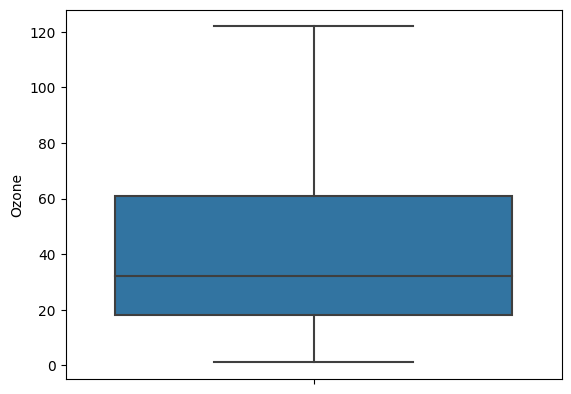

In [49]:
# 5. 이상치 인식
import seaborn as sns
import pandas as pd
df = pd.read_csv('data/airquality.csv')
# 5-1) sns 이상치 인식
#sns.boxplot(data = df, x = 'Ozone')
print(len(df))
print('----------')
# 5-2) 이상치 인식 함수
# Q1 : 최소값부터 ~ 하위 25%까지(상위 75%까지)
# Q2 : 중위값
# Q3 : 중위값부터 ~ 하위 75%까지(상위 25%까지)
# Q4 : 하위 75%(상위 25%)부터 ~ 최대값까지
# IQR = Q3 - Q1
# 이상치 기준 : Q1 - (IQR x 1.5) 보다 작거나, Q3 + (IQR x 1.5) 보다 클 경우
def detect_outlier (data = None, column = None, weight = None):
    Q1 = df[column].quantile(0.25) # 하위 기준
    Q3 = df[column].quantile(0.75) # 하위 기준
    
    IQR = Q3 - Q1
    IQR_wegiht = IQR * weight
    
    outlier_index = df[(df[column] < Q1 - IQR_wegiht) | (df[column] > Q3 + IQR_wegiht)].index
    
    return outlier_index


# 5-3) 이상치 값의 인덱스 확인
outlier_index = detect_outlier(df, 'Ozone', 1.5)
print(outlier_index)
print('----------')

# 5-4) df로 적용
df.loc[outlier_index, 'outlier'] = True
print(df[df['outlier'] == True])
print('----------')

# 5-5) Ozone의 이상치를 평균값으로 대치
df.loc[df['outlier'] == True, 'Ozone'] = df['Ozone'].mean()
print(df.iloc[[61,116], :])
print('----------')

# 5-6) Solar.R의 이상치를 삭제
outlier_index = dectect_outlier(df, 'Wind', 1.5)
print(outlier_index)
print(df.loc[outlier_index, :])
df = df.drop(outlier_index, axis = 0).reset_index(drop = True)
print(len(df))
print('----------')

# 5-7) Boxplot 재확인
sns.boxplot(data = df, y = 'Ozone')

In [48]:
# 6. 범주형 변수 변환
# 모델에 적용할 때 수치형만 가능 
# 범주형 변수(이산형 혹은 category)일 경우 one-hot encoding 방식으로 변환
# one-hot-encoding : 해당 범주에 속하면 1, 아니면 0
import pandas as pd
df = pd.read_csv('data/titanic.csv')
print(df.head)
print('----------')

# 6-1) sex와 class 컬럼을 one-hot encoding 진행
df = pd.get_dummies(df, columns = ['sex', 'class'])
df.head()

<bound method NDFrame.head of      survived  pclass     sex   age  sibsp  parch     fare embarked   class  \
0           0       3    male  22.0      1      0   7.2500        S   Third   
1           1       1  female  38.0      1      0  71.2833        C   First   
2           1       3  female  26.0      0      0   7.9250        S   Third   
3           1       1  female  35.0      1      0  53.1000        S   First   
4           0       3    male  35.0      0      0   8.0500        S   Third   
..        ...     ...     ...   ...    ...    ...      ...      ...     ...   
886         0       2    male  27.0      0      0  13.0000        S  Second   
887         1       1  female  19.0      0      0  30.0000        S   First   
888         0       3  female   NaN      1      2  23.4500        S   Third   
889         1       1    male  26.0      0      0  30.0000        C   First   
890         0       3    male  32.0      0      0   7.7500        Q   Third   

     adult_male  emba

,survived,pclass,age,sibsp,parch,fare,embarked,adult_male,embark_town,sex_female,sex_male,class_First,class_Second,class_Third
0,0,3,22.0,1,0,7.2500,S,True,Southampton,0,1,0,0,1
1,1,1,38.0,1,0,71.2833,C,False,Cherbourg,1,0,1,0,0
2,1,3,26.0,0,0,7.9250,S,False,Southampton,1,0,0,0,1
3,1,1,35.0,1,0,53.1000,S,False,Southampton,1,0,1,0,0
4,0,3,35.0,0,0,8.0500,S,True,Southampton,0,1,0,0,1


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


고유값 :  [20.89551896 11.75513248  4.7013819   1.75816839]
각 고유값의 분산 :  [2.93035378 0.92740362 0.14834223 0.02074601]
각 고유값의 분산 설명력(비율) :  [0.72770452 0.23030523 0.03683832 0.00515193]
----------
        PC1       PC2
0 -2.264542  0.505704
1 -2.086426 -0.655405
2 -2.367950 -0.318477
3 -2.304197 -0.575368
4 -2.388777  0.674767
----------


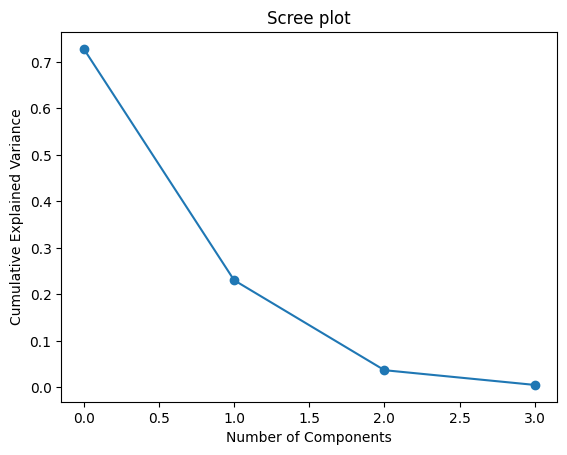

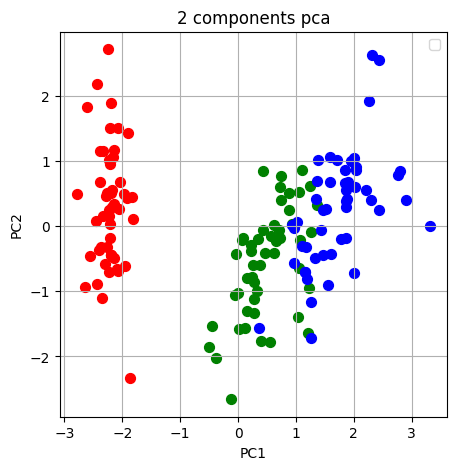

In [104]:
# 7. 변수축소(주성분분석)
# 상관성이 높은 변수들끼리 선형결합하여 주성분이라는 새로운 변수를 생성.
# 상관성이 높은 변수들을 요약 및 축소하기 위한 목적.
# 사전의 표준화, 정규화 필요.
# 분산의 설명력이나, scree_plot으로 주성분의 개수를 선택.
import pandas as pd
df = pd.read_csv('data/iris.csv')

# 7-1) 수치형 변수 추출
numeric_columns = ['sepal length', 'sepal width', 'petal length', 'petal width']
df_list = df.loc[  : , numeric_columns].values

# 7-2) 표준화 진행
from sklearn.preprocessing import StandardScaler
df_list_after_ss = StandardScaler().fit_transform(df_list) # 전체 데이터에 대한 표준화 진행

# 7-3) PCA 분석
from sklearn.decomposition import PCA
first_PCA = PCA().fit(df_list_after_ss) # 주성분 개수를 결정하기 위해 fit만 진행
print('고유값 : ' , first_PCA.singular_values_)
print('각 고유값의 분산 : ', first_PCA.explained_variance_)
print('각 고유값의 분산 설명력(비율) : ', first_PCA.explained_variance_ratio_) # 보통 누적기여율 85%까지
print('----------')
# 7-4) Scree plot
import matplotlib.pyplot as plt
plt.title('Scree plot')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.plot(first_PCA.explained_variance_ratio_, 'o-') # 고유값이 급격하기 완만하게 되기 지점의 전 단계가 주성분의 개수

# 7-5) 주성분 개수 결정 후 PCA 재실행
from sklearn.decomposition import PCA
second_PCA = PCA(n_components=2).fit_transform(df_list_after_ss) # 주성분 개수를 결정했으므로, fit_transform 진행
df_after_second_PCA = pd.DataFrame(second_PCA, columns = ['PC1', 'PC2'])
print(df_after_second_PCA.head())
print('----------')

# 7-6) PCA 시각화
import matplotlib.pyplot as plt
fig = plt.figure(figsize = (5,5))
ax = fig.add_subplot(1,1,1)
ax.set_xlabel('PC1', fontsize = 10)
ax.set_ylabel('PC2', fontsize = 10)
ax.set_title('2 components pca', fontsize = 12)

targets = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
colors = ['r', 'g', 'b']

for target, color in zip(targets, colors): 
    indicesToKeep = df['target'] == target
    ax.scatter(df_after_second_PCA.loc[indicesToKeep, 'PC1'],
               df_after_second_PCA.loc[indicesToKeep, 'PC2'],
               c = color,
               s = 50
              )
    
ax.legend()
ax.grid()